### Ejercicio 1

En clase vimos que la función `bits` permite ver la representación binaria de números de punto flotante (`Float64`) o de enteros (e.g., `Int64`). En particular, para números de punto flotante, el primer bit es el signo, los siguiente 11 son el *exponente* y el resto es la representación binaria (sin el 1 del principio), del número en cuestión.

La pregunta es ¿qué significa el exponente?

```julia
bits(0.1)
"0111111111110000000000000000000000000000000000000000000000000000"
```

**Respuesta**
La representacion binaria de un numero de punto flotante se basa en la idea de la notación cientifica. 
$$ M \times B^E , $$ donde $B$ es la  base (entero mayoro que uno), $M= (d_0.d_1 ... d_p)_B y d_k=0,1,...,B-1$ es la *matissa* o un conjunto  de números significativos (por lo que a veces tambien se le llama *significand*, y un exponente denotado por la letra *E*. 


Sin embargo,  número de punto flotante se expresa así:

$ (-1)^{\sigma}\times B^E  \times M $ ...(1)

donde $\sigma=0,1$ es el signo.

Se pide que la notación sea única. Por ejemplo, para los reales $ 0.1_{10}= 1 \times 10^{-1} = 0.001 \times 10^2 $. Cada uno de estos ejemplos cumple con la ecuación (1), para $B=10, \sigma=0$, pero tiene distintos valores de E.  Lo que se suele hacer es pedir que $d_0$ no sea cero; a estos números flotantes se les llama normales. Esto hace que, en el ejemplo de 0.1_{10}, la única notación aceptada sea $(-1)^0 \times 10^{-1} \times 1.0...0$ y  en este caso E=-1.

Para B=2, los números flotantes normales tienen $d_0=1$ siempre; y por lo mismo no se escribe. Entonces,usando la convención de la IEEE-754, el primer bit es $\sigma$, los siguientes 11 están relacionados con el expoenente, y los 52 bits que restan (que en realidad son 53 gracias a que $d_0=1$) representan el significante. Es presisamente en esta convención, que se usa el bias 1023 para el exponente o  también llamada notación de exceso.

En esta notación de exceso lo que se hace es sumar o restar a 1023 el exponente o la potencia de dos (por ser una representación binaria) a la que se multiplica la mantissa para obtener el número desado.

Veamos algunos ejemplos para aclarar estas notas.

- El número $1.75_{10}$ se puede escribir como $1.11_2=1.11\times 2^0$ (los subíndices idican la base que se usa).
Así $1.11_2=\sigma\times E\times M $ con $\sigma=0, E=01111111111, M=11$ $$0\ 01111111111 \ 11000...000$$

y aquí es donde se aclara lo del exponente, pues el número $011111111111$ corresponde, en base binaria al número 1023, que es igual a $1023_{10}=1023_{10}+0_{10}$ que el cero es el exponente de la expresión $1.11_2=1.11\times 2^0 $ 

- El número $15_{10}$ es igual a $1111_2=1.111\times2^3$ y  aqui se toma el exponente $3$ y se suma a 1023_{10} para obtener 1026_{10} ($E_{10}=1023_{10}+3_{10}=1026_{10}$) que en representación binaria es $E_2=10000000010$. Por tanto en notación de IEEE-754 tendríamos

$$ 0\  10000000010\  11100000000000000...000$$
 

*fuente: Comentario hecho por Luis Benet en respuesta a mi pull request en git hub https://github.com/lbenet/2016-1_TemasSelectosFisComp/pull/7#issuecomment-135556824 *

### Ejercicio 2

- ¿Cuál es el número más chico que sumado (o restado) a 1.0 me da algo distinto de 1.0?
(Este número se bautiza como el "épsilon de la máquina")

- ¿Cuál es el número más chico que sumado (o restado) a 10.0 me da algo distinto de 10.0?


**Respuesta**
Intentaré hacer un par de  pequeños programitas que hagan un ciclo para comparar algunas cantidades.
Mi idea fue tomada de una página de internet (http://ordenador.wingwit.com/Programacion/computer-programming-languages/87555.html).
La idea fundamental es ir sumando cosas cada vez mas pequeñas que $1$ e ir comparando el resultado de la suma con $1$, esto hacerlo en ciclo hasta que la suma y $1$ "coincidan".

In [3]:
x=1
cont=0
while 1+x/2>1
    cont=cont+1
    x=x*0.5  
end
println("El epsilon de la maquina es ",x) 

El epsilon de la maquina es 2.220446049250313e-16


In [4]:
x=1
cont=0
while 10+x/2>10
    cont=cont+1
    x=x*0.5  
end
println("El epsilon de la maquina para 10 es ",x) 

El epsilon de la maquina para 10 es 1.7763568394002505e-15


### Ejercicio 3

Define una functión llamada `derivada1` que implemente el cálculo de:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0)}{h}
$$

Obviamente esta función es una aproximación *finita* de la derivada. La pregunta es ¿qué tan buena es esta aproximación, pensando en términos de $h$?

- La primer sub-pregunta es ¿cómo se responde este tipo de pregunta?
- Uno tiene que tomar un caso concreto (para $f(x_0,h)$); sugiero empezar con un polinomio con coeficientes enteros, y después hacer el mismo tipo de pruebas con una función trascendental.
- ¿Hay algo *sorprendente* en el comportamiento de `derivada1` como función de $h$? ¿A qué lo puedes atribuir?
- ¿Puedes hacer que la función `derivada1` funcione para funciones más o menos arbitrarias, que el usuario define?
- ¿Puedes explicar de alguna manera los resultados que has obtenido?

**Primera subrespuesta**
Para saber que tan buena es una aproximación debemos poder comaprar los resultados del la aproximación finita de la derivada con  los valores exactos de la derivada; como los valores de la aproximación cambiarán en función de $h$, esperaríamos que el error sea fución de h, esto es: $err(h)$. Utilizando el concepto de epsilon de la maquina nos gustaria que el parametro $h$ satisfaga una igualdad del tipo: 

$$ err(h) =  abs[f'(x_0)-derivada1(x_0)] \geq \epsilon   $$

Con $f'(x_0)$ siendo el valor exacto de la derivada.
Para hacer esto definamos el polinomio $f(x)=5x^2+4x+1$ e iniciemos con un valor $h=0.125$

In [2]:
f(x)=5x^2+4x+1
fp(x)=10x+4
h=0.125
derivada1(x)=(f(x+h)-f(x))/h
err(x)=abs(fp(x)-derivada1(x))
println("La derivada de f en x=4 es ",fp(4))
println("La aproximación finita en x=4es ",derivada1(4))
println("El error es ",err(4))

La derivada de f en x=4 es 44
La aproximación finita en x=4es 44.625
El error es 0.625


Para conocer el comportamiento de derivada1(x) como función de $h$ vamos a arreglar el codigo anterior en forma de ciclo y probaremos para distintas $h's$

In [3]:
f(x)=5x^2+4x+1
fp(x)=10x+4
#h=0.125 implementé el cambio en el intervalod e las h´s
derivada1(x)=(f(x+h)-f(x))/h
err(x)=abs(fp(x)-derivada1(x))
 println("La derivada de f en x=4 es ",fp(4))

for i in 1:10 
    h=1e-2/(2^i)
    println("h en este paso vale ",h)
    #println("La aproximación finita en x=4es ",derivada1(4))
    println("El error es ",err(4))
    println()
    
end

La derivada de f en x=4 es 44
h en este paso vale 0.005
El error es 0.024999999999181455

h en este paso vale 0.0025
El error es 0.012500000002319211

h en este paso vale 0.00125
El error es 0.006249999983992893

h en este paso vale 0.000625
El error es 0.0031250000174622983

h en este paso vale 0.0003125
El error es 0.0015624999887222657

h en este paso vale 0.00015625
El error es 0.000781249997089617

h en este paso vale 7.8125e-5
El error es 0.00039062493306118995

h en este paso vale 3.90625e-5
El error es 0.00019531276484485716

h en este paso vale 1.953125e-5
El error es 9.765740833245218e-5

h en este paso vale 9.765625e-6
El error es 4.883063957095146e-5



La siguiente celda contiene una modificación a la celda anterior, para mostrar una gráfica del error en función de h.

In [1]:
using PyPlot

INFO: Loading help data...


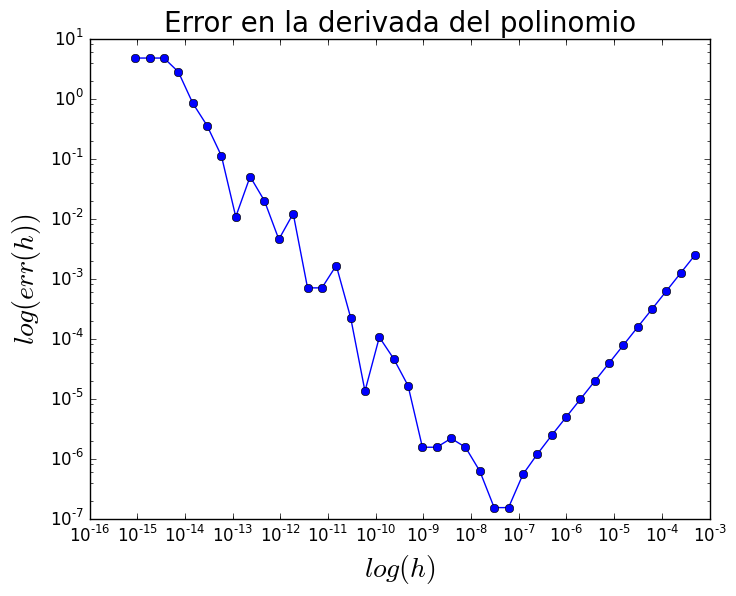

In [7]:
f(x)=5x^2+4x+1
fp(x)=10x+4
n=40
h=zeros(n) 
yerr=zeros(n)
x=3.2
derivada1(h)=(f(x+h)-f(x))/h
err(h)=abs(fp(x)-derivada1(h))
 #println("La derivada de f en x=4 es ",fp(x))
for i in 1:n
    h[i]=1e-3/(2^i)
    #println("h en este paso vale ",h[i])
    #println("La aproximación finita en x=4es ",derivada1(h[i]))
    #println("El error es ",err(h[i]))
    yerr[i]=err(h[i])
    
end
loglog(h,yerr,"bo-")
#axis([0,1/2^(n),0,2])
title("Error en la derivada del polinomio",fontsize=20)
xlabel(L"log(h)",fontsize=20)
ylabel(L"log(err(h))",fontsize=20);



Para una función trascendental hagamos un "copy-paste" de la celda anterior y cambiemos la definición de la función f(x) y el punto x en donde es evaluada la función.

La derivada de f en x=4 es 0.3623577544766736


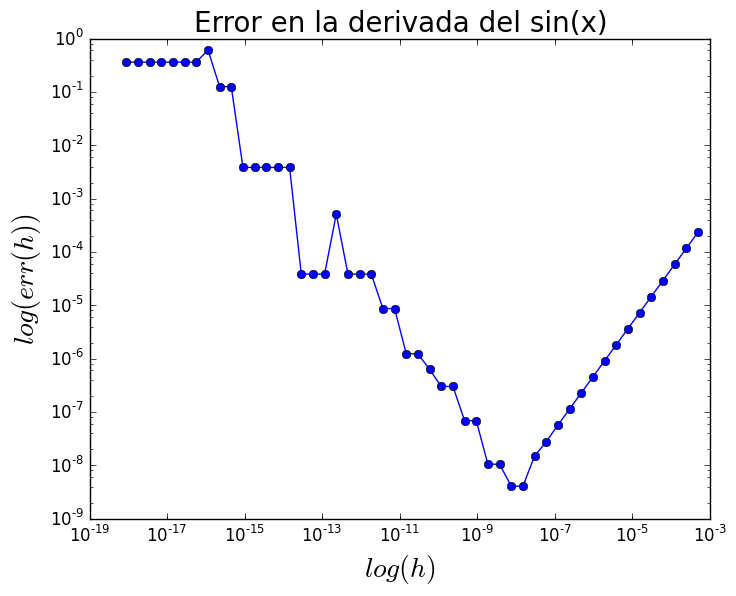

In [8]:
f(x)=sin(x)
fp(x)=cos(x)
n=50
h=zeros(n) 
yerr=zeros(n)
x=1.2
derivada1(h)=(f(x+h)-f(x))/h
err(h)=abs(fp(x)-derivada1(h))
 println("La derivada de f en x=4 es ",fp(x))
for i in 1:n
    h[i]=1e-3/(2^i)
    #println("h en este paso vale ",h[i])
    #println("La aproximación finita en x=1 es ",derivada1(h[i]))
    #println("El error es ",err(h[i]))
    #println()
    yerr[i]=err(h[i])
    
end
loglog(h,yerr,"bo-")
#axis([0,1/2^(n-2),0,2])
title("Error en la derivada del sin(x)",fontsize=20)
xlabel(L"log(h)",fontsize=20)
ylabel(L"log(err(h))",fontsize=20);



Ya encontre lo sorprendente, a partir de $h=5.960464477539063\times10^{-11}$, el error en luga de seguir decreciendo linealmente, empieza a aumentar de nuevo y esta vez el error aumenta rapidísmo, primero oscila un poco y luego parece aumentar dos ordenes de magnitud.


### Ejercicio 4

Este ejercicio es equivalente al anterior, pero considerando la función `derivada2` que implemente el cálculo de:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0-h)}{2h}
$$

¿Puedes explicar por qué la convergencia es mejor en este caso?


Para comparar la convergencia utilizaré el mismo polinomio que en el ejercicio anterior y lo evaluaré también en $x=4$ , por lo que que volveré a hacer un "copy-paste" de la celda que grafica el  error como función de $h$ pero cambiando la definición de la aproximación a la derivada.
Lo que espero es obtener una gráfica cuya pendiente sea  mayor a la que obtuve arriba.

La derivada de f en x=3.12 es 35.2


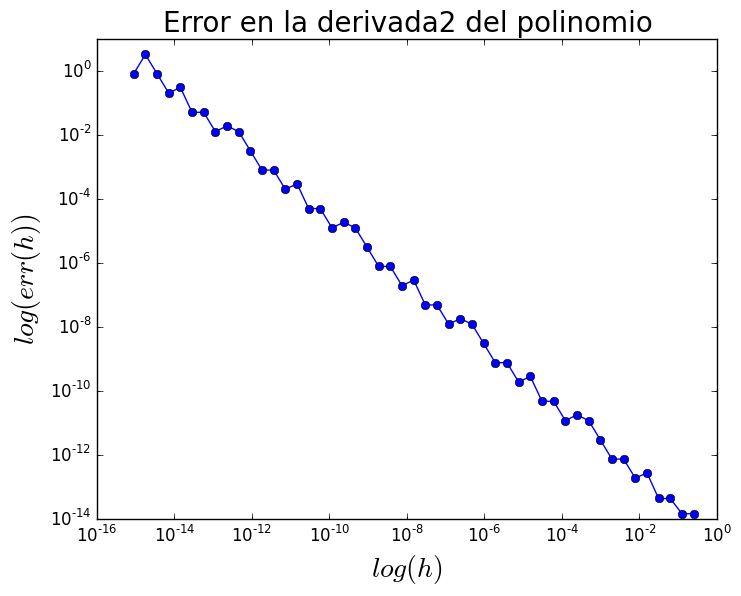

In [10]:
f(x)=5x^2+4x+1
fp(x)=10x+4
n=50
h=zeros(n) 
yerr=zeros(n)
x=3.12
derivada2(h)=(f(x+h)-f(x-h))/2h #aqui fue donde cambie la definición de derivada1 por derivada 2
err(h)=abs(fp(x)-derivada2(h))
 println("La derivada de f en x=3.12 es ",fp(x))
for i in 1:n
    h[i]=1/(2^i)
    #println("h en este paso vale ",h[i])
    #println("La aproximación finita en x=3.2 es ",derivada2(h[i]))
    #println("El error es ",err(h[i]))
    #println()
    yerr[i]=err(h[i])
    
end

loglog(h,yerr,"bo-")
#axis([0,1/2^(40),0,4])
title("Error en la derivada2 del polinomio",fontsize=20)
xlabel(L"log(h)",fontsize=20)
ylabel(L"log(err(h))",fontsize=20);



La derivada de f en x=1 es -0.9997668877129283


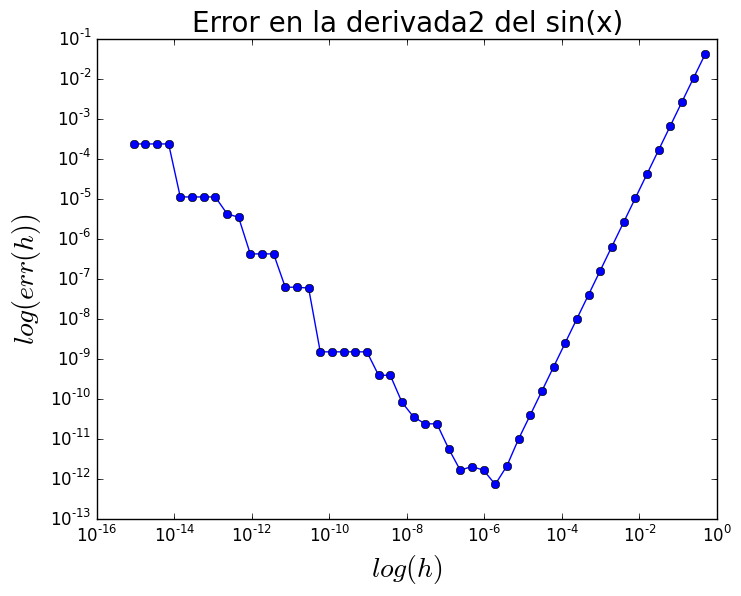

In [12]:
f(x)=sin(x)
fp(x)=cos(x)
n=50
h=zeros(n) 
yerr=zeros(n)
x=3.12
derivada2(h)=(f(x+h)-f(x-h))/2h #aqui fue donde cambie la definición de derivada1 por derivada 2
err(h)=abs(fp(x)-derivada2(h))
 println("La derivada de f en x=1 es ",fp(x))
for i in 1:n
    h[i]=1/(2^i)
    #println("h en este paso vale ",h[i])
    #println("La aproximación finita en x=3.2 es ",derivada2(h[i]))
    #println("El error es ",err(h[i]))
    #println()
    yerr[i]=err(h[i])
    
end

loglog(h,yerr,"bo-")
#axis([0,1/2^(n-2),0,2])
title("Error en la derivada2 del sin(x)",fontsize=20)
xlabel(L"log(h)",fontsize=20)
ylabel(L"log(err(h))",fontsize=20);

Comparando las gráficas para $err(h)$ (tanto para el polinomio como para la función $sin(x)$) entre las dos diferentes aproximaciones, ```derivada1(x)```y ```derivada2(x)```, vemos claramente que $err(h)$ tiende mucho más rápido a cero en ```derivada2``` que en ```derivada1```. 

En el caso del polinomio el error es prácticamente igual a cero desde el principìo para derivada2, y conforme h se hace más pequeña, el error parece tender a cero, como esperaríamos, sin embargo cuando $h$ es del orden de $10^{-15}$ para el caso del polinomio, el error aumentamuy rápido y para el caso del sin(x), el errror empieza a aumentar cuando $h$ es del orden de $ 3 \times 10^{-6}$.
Atribuyo este comportamiento al tipo de aritmética que utiliza la computadora para la representación binaria de los números.

En el caso del $sin(x)$ podemos ver mejor que el error en ```derivada2```converge más rápido a cero que en ```derivada1```pues la curva que se obtuvo para derivada2 se parece a una parábola y para derivada1 es una recta.

La idea con la que podría explicar el porque de la mejor convergencia de ```derivada2(x)```es una idea geométrica que tiene que ver la recta secante definida por los puntos $(x_0-h,f(x_0-h)),(x_0+h,f(x_0+h))$, cuya pendiente es precisamente la definición de derivada2, y con la pendiente de la secante definida con los puntos $(x_0,f(x_0)),(x_0+h,f(x_0+h))$ dada por derivada1.

En pocas palabras la secante de derivada2 se parece mucho más a la recta tangente (derivada real) que la secante de derivada1.


### Ejercicio 5

Manda el notebook con tus resultados haciendo un pull-request al repositorio del curso. Para hacer esto:
- Haz un `fork` del repositorio del curso a tu propia cuenta en GitHub
- Una vez que tengas resuelto el notebook, súbelo a **tu** repositorio (con `git push`), en la carpeta "tareas/usuario_github/nombre_notebook"
- Desde tu repositorio, haz un "Pull Request". El *pull request* sólo se aceptará si es legible en el sentido más amplio de la palabra y, obviamente, si es correcto. Esto significa que debe ser *entendible*, a partir de lo que ustedes escriben, incluso para gente que no está en el curso. (Como GitHub es público, piensen fríamente que esto puede ser leido por *muuucha* gente allá afuera.) Si el trabajo es en colaboración, háganlo saber en el propio notebook (cosa que se debe notar en el historial de lo que envíen). Finalmente, como código ético, incluyan cualquier fuente de inspiración, incluso cuando se trate del notebook de otro compañero/equipo del curso.